# Applying sentiment analysis to your social network

## Step 1: Extract Data

### Twitter

In [1]:
import tweepy
from tweepy import OAuthHandler


import twitterCredentials

ModuleNotFoundError: No module named 'twitterCredentials'

In [ ]:
api_key = twitterCredentials.api_key
api_secret = twitterCredentials.api_secret
access_token = twitterCredentials.access_token
access_secret = twitterCredentials.access_secret

auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
book = xlsxwriter.Workbook('Test1.xlsx')
sheet = book.add_worksheet('Data')
row = 0
col = 0
 
header = ["Date", "Day", "Tweet", "Retweets", "Likes"]
for title in header:
    sheet.write(row, col, title)
    col += 1
row = 1

In [ ]:
name = "cnnespan"

timeline = api.user_timeline(id=name, count=500 )

for tweet in timeline:
    print(tweet.text)
    data = [tweet.created_at.date().strftime("%b %d %Y "), tweet.created_at.date().strftime("%b %d"), tweet.text, tweet.retweet_count, tweet.favorite_count]
    col = 0
    
    for text in data:
        sheet.write(row, col, text)
        col += 1
    row += 1
    
book.close()

### Facebook

In [5]:
import xlsxwriter
from facebook_scraper import get_posts
from textblob import TextBlob

In [16]:
book = xlsxwriter.Workbook('test2.xlsx')
sheet = book.add_worksheet('libro')
row = 0
col = 0
 
sheet.write(row, col, "Post")
row = 1

In [17]:
fb_pages = ['ClubLecturaQuelibroleo', 'elasticsearch']
for post in get_posts(fb_pages[0], pages=4):
    b = TextBlob(post['text'])
    
    if b.detect_language() == 'es':
        print(post['text'])
        sheet.write(row, 0, post['text'])
        row += 1
    
book.close()

Seguimos con la lectura de «El relojero de la puerta del sol». En los capítulos 25 al 49, estas son las preguntas que nos han surgido. Os recordamos, como siempre, que podéis comentar libremente pero intentar… More no desvelar nada importante del libro ni hacer spoiler.
📙 ¿Qué os ha parecido lo que hemos leído hasta ahora?
📙 ¿Cómo creéis que un hombre tan humilde llegó a ser el mejor relojero de Inglaterra?
📙 ¿Quién creéis que persigue a Losada? ¿Le ayudará Prim a descubrir su identidad?
#clubdelectura #clublectura #clubdelecturaqll #ElRelojerodelaPuertadelSol #lecturasocial #lecturaconjunta #Siruela #coleccionarlibros #quelibroleo #leer #libro #libros Ediciones Siruela
Genoveva comparte con nosotros esta información.
Capítulo 11.- Jaén
“Aquel anochecer, José, ascendido a teniente en febrero, cenaba una refrescante pipirrana:”
«EL RELOJERO DE LA PUERTA DEL SOL»
La pipirrana… More es una ensalada cuyos ingredientes básicos son cebolla, tomate, pimiento verde y pepino (en zonas del sur d

## Step 2: Load Data

In [18]:
import pandas as pd

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

%matplotlib inline

In [19]:
datos_excel = pd.read_excel(open('test2.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)
datos_excel.head()

,Post
0,Seguimos con la lectura de «El relojero de la ...
1,Genoveva comparte con nosotros esta informació...
2,Arely comparte con nosotros una nueva publicac...
3,Arely Bueso‎Club de Lectura Quelibroleo.com\nF...
4,"Capítulo 13\n""De las ramas más bajas colgaban ..."


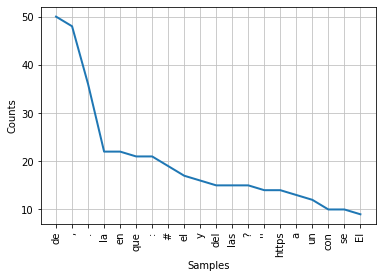

In [21]:
Post = ""
for data in datos_excel['Post']:
    Post += data
    
freq = FreqDist(word_tokenize(Post))
freq.plot(20)

## Step 3: Clean Data

In [23]:
import emoji
import re

from nltk.corpus import stopwords
import string

In [ ]:
stopwordList = stopwords.words("Spanish")
stopwordList

In [25]:
punctuationList = list(string.punctuation)
punctuationList

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [51]:
stopwordsList = stopwordList + punctuationList + ['“','”','¡','¿', "''",'``','...','→','⬥', '«', '»']
#stopwordsList

In [52]:
Post = Post.lower()
# Post

In [44]:
def clean_tweets_emoji(text):
    allchars = [stri for stri in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    
    return clean_text

In [58]:
tweets_clean_emoji = clean_tweets_emoji(Post)
tweets_clean_emoji

'seguimos con la lectura de «el relojero de la puerta del sol». en los capítulos 25 al 49, estas son las preguntas que nos han surgido. os recordamos, como siempre, que podéis comentar libremente pero intentar… more no desvelar nada importante del libro ni hacer spoiler. ¿qué os ha parecido lo que hemos leído hasta ahora? ¿cómo creéis que un hombre tan humilde llegó a ser el mejor relojero de inglaterra? ¿quién creéis que persigue a losada? ¿le ayudará prim a descubrir su identidad? #clubdelectura #clublectura #clubdelecturaqll #elrelojerodelapuertadelsol #lecturasocial #lecturaconjunta #siruela #coleccionarlibros #quelibroleo #leer #libro #libros ediciones siruelagenoveva comparte con nosotros esta información. capítulo 11.- jaén “aquel anochecer, josé, ascendido a teniente en febrero, cenaba una refrescante pipirrana:” «el relojero de la puerta del sol» la pipirrana… more es una ensalada cuyos ingredientes básicos son cebolla, tomate, pimiento verde y pepino (en zonas del sur de anda

In [59]:
def clean_tweets_regex(text):
    tweet = re.sub(r'@[a-zA-Z0-9-_.]+', '', text)
    tweet = re.sub(r'#[a-zA-Z0-9-_.]+', '', tweet)
    tweet = re.sub(r'https://[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'www.[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'[a-zA-Z0-9-./]+[…]', '', tweet)
    tweet = re.sub(r'[ ]+[…]', '', tweet)
    tweet = re.sub('\n|\r', '', tweet)
    tweet = re.sub(r'[á|ä|â|à]', 'a', tweet)
    tweet = re.sub(r'[é|ê|è]', 'e', tweet)
    tweet = re.sub(r'[í|î|ì]', 'i', tweet)
    tweet = re.sub(r'[ó|ô|ò]', 'o', tweet)
    tweet = re.sub(r'[ú|û|ù|ü]', 'u', tweet)
    tweet = re.sub(r'RT ', '', tweet)
    tweet = re.sub(r'[^\s\w]', '', tweet)
    return tweet

In [60]:
tweets_clean = clean_tweets_regex(tweets_clean_emoji)
tweets_clean

'seguimos con la lectura de el relojero de la puerta del sol en los capitulos 25 al 49 estas son las preguntas que nos han surgido os recordamos como siempre que podeis comentar libremente pero  more no desvelar nada importante del libro ni hacer spoiler que os ha parecido lo que hemos leido hasta ahora como creeis que un hombre tan humilde llego a ser el mejor relojero de inglaterra quien creeis que persigue a losada le ayudara prim a descubrir su identidad             ediciones siruelagenoveva comparte con nosotros esta informacion capitulo 11 jaen aquel anochecer jose ascendido a teniente en febrero cenaba una refrescante pipirrana el relojero de la puerta del sol la  more es una ensalada cuyos ingredientes basicos son cebolla tomate pimiento verde y pepino en zonas del sur de andalucia se da tambien su preparacion sin pepino a veces se le añade huevo cocido algun tipo de pescado de carne prieta o incluso embutidos se consume en las provincias españolas de malaga granada jaen almeri

In [ ]:
filtro = [palabra for palabra in word_tokenize(tweets_clean) if palabra not in stopwordsList]
filtro

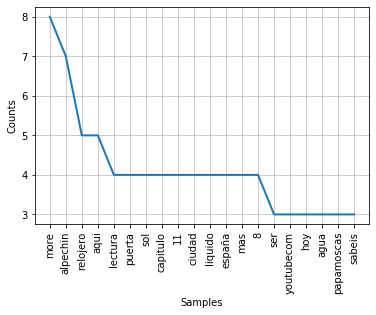

In [62]:
freq = FreqDist(filtro)
freq.plot(20)

## Step 4: Process Data

### Tweets en Español

In [50]:
from nltk.classify import NaiveBayesClassifier

In [63]:
datos_excel = pd.read_excel(open('taggedTweets.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)
sample = datos_excel.sample(len(datos_excel))
sample

,Tweet,Retweets,Favoritos,Sentimiento
190,RT @NDtitulares: Deserción estudiantil en las ...,16,0,neg
1091,#FelizLunes #2Feb En el marco del XLI Aniversa...,1,6,pos
796,"Se invita a la ""Jornada de Recolección de Marc...",6,4,neu
404,RT @somosupel: #UPEL Rechaza exigencia del MPP...,83,0,neg
412,RT @VTVcanal8: Jefe de Estado: Por seguir el l...,15,0,neg
...,...,...,...,...
1313,#UltimaHora Rector de la UNET se reunió con el...,98,128,pos
1215,RT @ceofanb: Bolívar “Gral José Laurencio Silv...,258,0,pos
885,Instalado I Congreso Binacional de Investigaci...,7,9,neu
959,RT @egeneralesuna: #UniversidadNacionalAbierta...,6,0,pos


In [64]:
def construirBolsaDePalabras(palabras):
    diccionario={}
    for palabra in word_tokenize(palabras):
        if palabra not in stopwordsList:
            diccionario[palabra]=1
    return diccionario

In [65]:
rasgosNegativos = []
rasgosPositivos = []
rasgosNeutrales = []
    
for indice_fila, fila in sample.iterrows():
    tweet_clean = clean_tweets_emoji(fila['Tweet'])
    tweet_clean = clean_tweets_regex(tweet_clean)
    if fila['Sentimiento'] == 'pos':
        rasgosPositivos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    elif fila['Sentimiento'] == 'neu':
        rasgosNeutrales.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    else:
        rasgosNegativos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))

In [66]:
len(rasgosPositivos)

454

In [67]:
rasgosPositivos[5]

({'Psicologo': 1,
  'Clinico': 1,
  'Yhon': 1,
  'Cortes': 1,
  'dictara': 1,
  'charla': 1,
  'motivacional': 1},
 'pos')

In [68]:
divP=int(len(rasgosPositivos)*0.95)
divNeu=int(len(rasgosNeutrales)*0.95)
divNeg=int(len(rasgosNegativos)*0.95)
clasificadorSentimiento=NaiveBayesClassifier.train(rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])

In [69]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])

0.94276875483372

In [70]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[divP:]+rasgosNegativos[divNeg:]+rasgosNeutrales[divNeu:])

0.6666666666666666

In [71]:
clasificadorSentimiento.show_most_informative_features()

Most Informative Features
                    UCLA = 1                 neg : neu    =     29.0 : 1.0
             Autoridades = 1                 neg : pos    =     17.7 : 1.0
                  invita = 1                 neu : neg    =     14.3 : 1.0
               Venezuela = 1                 neg : pos    =     13.8 : 1.0
                  quiere = 1                 pos : neg    =     11.0 : 1.0
                     Las = 1                 neg : pos    =     10.6 : 1.0
                  inicia = 1                 pos : neg    =     10.3 : 1.0
                    toda = 1                 neu : neg    =      9.7 : 1.0
                Ciencias = 1                 neg : neu    =      9.7 : 1.0
                    años = 1                 pos : neu    =      9.0 : 1.0


In [72]:
tweet = "¿El peor solo de guitarra de la historia? Burlas a Nick Jonas por su interpretación"

print(tweet)
tweet_clean = clean_tweets_emoji(tweet)
tweet_clean = clean_tweets_regex(tweet_clean)
bolsa=construirBolsaDePalabras(tweet_clean)
print(bolsa)

¿El peor solo de guitarra de la historia? Burlas a Nick Jonas por su interpretación
{'El': 1, 'peor': 1, 'solo': 1, 'guitarra': 1, 'historia': 1, 'Burlas': 1, 'Nick': 1, 'Jonas': 1, 'interpretacion': 1}


In [73]:
clasificadorSentimiento.classify(bolsa)

'neg'

In [79]:
datos_excel = pd.read_excel(open('pyconcolombiaData.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)
muestra = datos_excel.sample(len(datos_excel))
muestra

,Date,Day,Tweet,Retweets,Likes
111,Feb 07 2020,Feb 07,RT @keeevinh: This is dope @MonadicalSAS! 🔥 #P...,6,0
9,Feb 09 2020,Feb 09,RT @stivenramireza: Con una de las tesas de la...,2,0
183,Jan 30 2020,Jan 30,¿Ya revisaste tu bandeja de entrada de correo ...,3,11
142,Feb 06 2020,Feb 06,Felipe Mejía @felipe_mejia_a en #PyConColombia...,0,3
199,Jan 26 2020,Jan 26,"@AlexGV04 Hola Alex. Si, en los próximos días ...",0,1
...,...,...,...,...,...
149,Feb 05 2020,Feb 05,William Gómez es uno de los voluntarios que ha...,1,9
193,Jan 27 2020,Jan 27,Oscar Cortez @oscar_mcm will be speaking at #P...,6,10
107,Feb 07 2020,Feb 07,¡Todos podemos hacer música! Jose Zapata nos r...,4,26
144,Feb 05 2020,Feb 05,Wendy Rueda es una de las voluntarias que hará...,1,5


In [80]:
positive = []
neutral = []
negative = []

In [81]:
libro = xlsxwriter.Workbook('test1Tag.xlsx')
hoja = libro.add_worksheet('Data')

data = ["Tweet","Sentimiento"]
row = 0
col = 0
 
for titulo in data:
    hoja.write(row, col, titulo)
    col += 1
row = 1
col = 0

for indice_fila, fila in muestra.iterrows():
    print(fila[2])
    tweet_clean = clean_tweets_emoji(fila[2])
    tweet_clean = clean_tweets_regex(tweet_clean)
    bolsa=construirBolsaDePalabras(tweet_clean)
    sent = clasificadorSentimiento.classify(bolsa)
    print("\033[0;31;40m "+sent+" \033[0m")
    hoja.write(indice_fila+row, 0, fila[2])
    hoja.write(indice_fila+row, 1, sent)
    if sent == 'pos':
        positive.append(fila[2])
    elif sent == 'neu':
        neutral.append(fila[2])
    else:
        negative.append(fila[2])
libro.close()

RT @keeevinh: This is dope @MonadicalSAS! 🔥 #PyConColombia2020 https://t.co/SalJFHcNJq
 pos 
RT @stivenramireza: Con una de las tesas de la @pyconcolombia ⚡⚡ @holamariacamila #PyconColombia2020 https://t.co/3yOAEBNlCa
 pos 
¿Ya revisaste tu bandeja de entrada de correo electrónico?

Hace unas horas se enviaron los resultados de Becas de… https://t.co/4yaeuoTxU6
 neu 
Felipe Mejía @felipe_mejia_a en #PyConColombia2020 nos hablará sobre "Creación de un pipeline básico de reconocimie… https://t.co/LiIj0ZYdJU
 pos 
@AlexGV04 Hola Alex. Si, en los próximos días enviaremos un email con el formulario de inscripción a talleres.
 neu 
Are you ready for PyCon Colombia 2020?

In just a few days the conference will begin, which brings together fans an… https://t.co/JEj9XAIsbn
 neg 
Yeimy Arévalo en #PyConColombia2020 nos hablará sobre "Creacion de un pipeline básico de reconocimiento facial".

R… https://t.co/hw1koO2hWa
 pos 
Germán Ramírez es uno de los voluntarios que harán parte de Pycon Colomb

### Tweets in English

In [ ]:
from textblob import TextBlob 

In [ ]:
excel_data = pd.read_excel(open('test2.xlsx','rb'))
excel_data = pd.DataFrame(excel_data)

In [ ]:
popularity_list = []
num_list = []
num = 1

for tweet in excel_data['Post']:
    print(tweet)
    
    analysis = TextBlob(tweet)
    analysis = analysis.sentiment
    print(analysis)
    popularity = analysis.polarity
    popularity_list.append(popularity)
    num_list.append(num)
    num = num + 1

## Step 5: ShowData

### Texto en Español

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

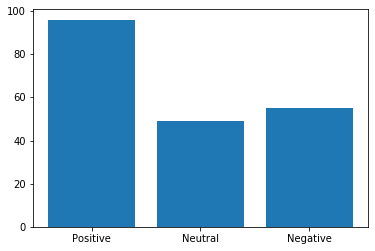

In [82]:
fig = plt.figure(u'Gráfica de barras')
ax = fig.add_subplot(111)

nombres = ['Positive','Neutral','Negative']
datos = [len(positive),len(neutral),len(negative)]
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)

plt.show()

### Text in English

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(num_list, popularity_list)
#plt.scatter(excel_data['Day'], popularity_list)
plt.title("Sentiments analysis to PyConCo2020")
plt.xlabel("Posts")
plt.ylabel("Sentiment")
plt.show()

### Bonus

In [77]:
from wordcloud import WordCloud

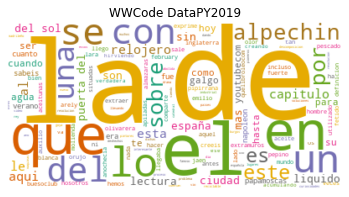

In [78]:
wordcloud = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(tweets_clean)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WWCode DataPY2019")
plt.show()